线性回归模型练习

In [101]:
import os
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

In [110]:
path = os.getcwd() + '/../data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=["Population", "Profit"]) # 手动设置 names, 这样可以填充第一行

In [69]:
data.head(5) # 显示前5行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [33]:
data.describe() # 对数据进行简单预览

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


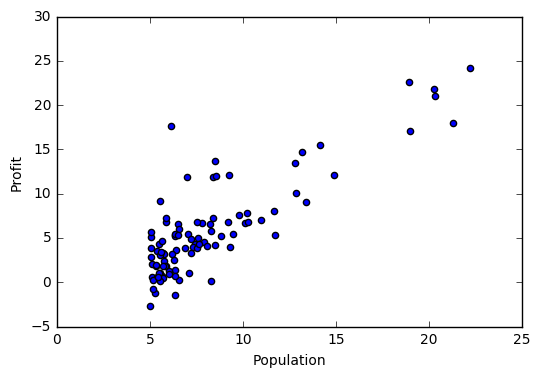

In [37]:
data.plot(kind="Scatter",x="Population", y="Profit") #这就是Pandas的强大之处

现在对数据进行线性回归建模，流程就是，数据处理-> 计算$w_{lin} = (X^TX)^{-1}X^Ty$->测试

In [111]:
# 首先分离train_data:X 和lable: y
# 需要注意的是，x=[1,value],而非只有value, 因为 y=wx+b, 这个1对应W的第一项b.
data.insert(0, 'b', 1)
data.shape

(97, 3)

In [72]:
x = data.iloc[:,0:2]
y = data.iloc[:,2:3]

In [79]:
x.head()

,b,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [82]:
X = np.matrix(x.values) # 形成X矩阵
Y = np.matrix(y.values) # 形成Y 矩阵

In [114]:
X.shape,Y.shape

((97, 2), (97, 1))

In [96]:
W = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
W

matrix([[-3.89578088],
        [ 1.19303364]])

这里计算出来了W,可以知道了 该方程为y = -3.89578088x + 1.19303364

In [127]:
# 绘制图像
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = W[0][0] + (W[1][0] * x)[0]

In [137]:
f=np.array(f[0])[0]

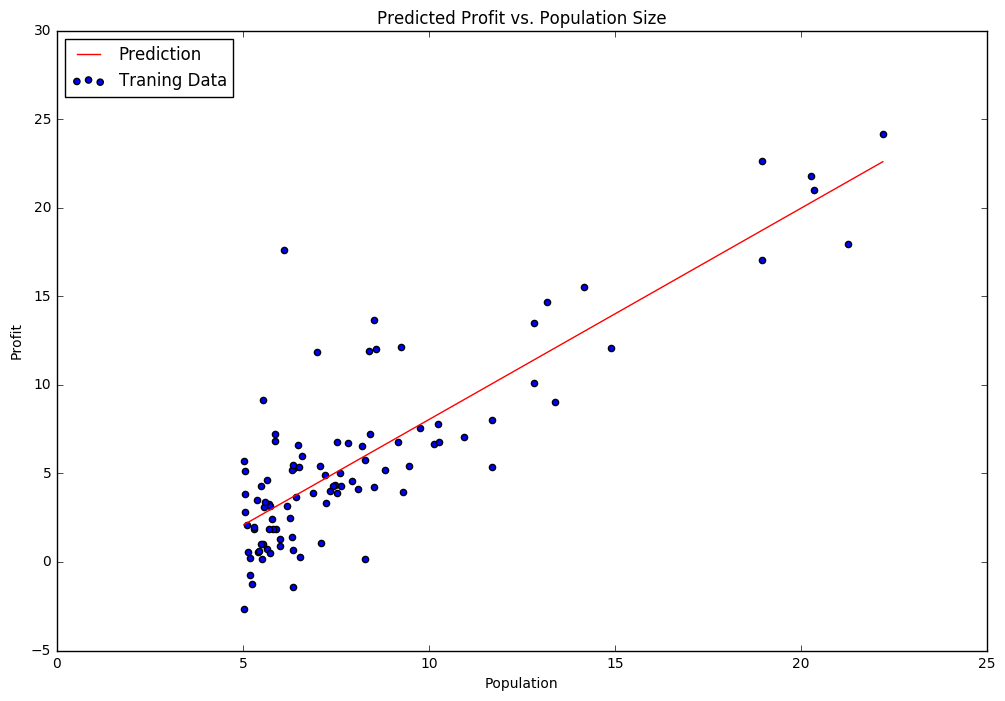

In [138]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')